In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [2]:
def pin_bd(num_bins: int=20, num_particles: int=1_000, num_adjacent_bins: int=10):
    """
    Generates Graphical Data for Pin-Like Competitive Ballistic Deposition.
    
    num_bins, num_particles: The parameters of the ballistic deposition are determined.

    num_adjacent_bins: How many adjacent bins can the dropped particle reach before settling down?
    """


    # The height of every bin will be changed randomly with the deposition of a particle at every instance of time.
    # This h will be returned and will be used to plot a histogram.
    h = np.ones(num_bins, dtype=int)
    # The main part of the code:
    for _ in range(num_particles):
        bin = np.random.randint(num_bins)
        # The particle examines these adjacent bins before settling down:
        adjacent_bins = [(bin+j)%num_bins for j in range(num_adjacent_bins)]
        # The probability of joining a bin is proportional to the height of that specific bin:
        probabilities = (h[adjacent_bins]) / np.sum(h[adjacent_bins])
        # Check the height of the neighbors and decide accordingly:
        bin = np.random.choice(adjacent_bins, p=probabilities)
        h[bin] += 1


    return h

In [3]:
# Generate Data:
h = pin_bd(num_bins=200, num_particles=1000, num_adjacent_bins=10)

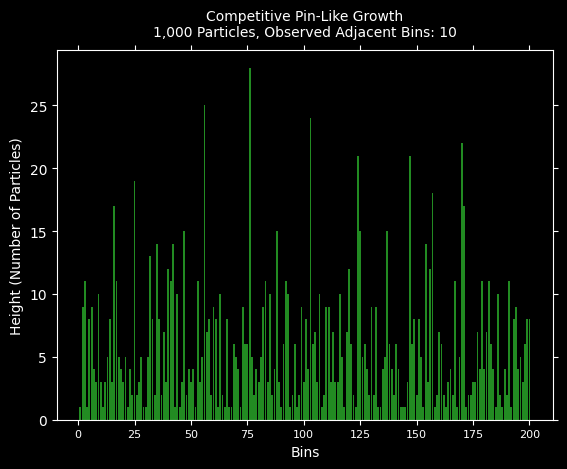

In [4]:
# Plot a histogram of the data obtained from the previous cell:
fig, ax = plt.subplots()
ax.clear()
ax.set_title("Competitive Pin-Like Growth\n1,000 Particles, Observed Adjacent Bins: 10", fontsize=10, pad=10)
ax.set_xlabel("Bins")
ax.set_ylabel("Height (Number of Particles)")
ax.tick_params(axis="x", labelsize=8, rotation=0)
ax.bar(x=range(1, len(h)+1), height=h, color="forestgreen");

In [5]:
# fig.savefig("PinLikeGrowth.jpg")